In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import matplotlib.cbook as cbook

In [2]:
#datasets=["youtube","dblp","amazon","lj","orkut","orkut","orkut"]
#dataset_min_nodes=[16,16,21,61,151,251,351]
#dataset_max_nodes=[20,20,25,65,155,255,355]

datasets=["youtube","dblp","amazon","lj"]
dataset_min_nodes=[16,16,21,61]
dataset_max_nodes=[20,20,25,65]

sources=["node2vec","deepWalk"]
targets=["TransE","TransH", "TransD", "SimplE", "DistMult"]
metrics = ['mean', 'iqr', 'cilo', 'cihi', 'whishi', 'whislo', 'q1', 'med', 'q3']
methods=['source','source2target','transformed']
colors = ['C2','C1','C3']
dim=32

In [3]:
plot_type = 'timing'
plot_methods = '-'.join(datasets)
plot_path = os.path.join(str(dim), plot_type, plot_methods)
df = pd.read_csv(plot_type + '.csv', sep=',', index_col=False, error_bad_lines=False)
if not os.path.exists(plot_path):
    os.makedirs(plot_path)

b'Skipping line 41592: expected 10 fields, saw 14\nSkipping line 41646: expected 10 fields, saw 14\nSkipping line 41650: expected 10 fields, saw 14\nSkipping line 41661: expected 10 fields, saw 14\nSkipping line 41662: expected 10 fields, saw 14\nSkipping line 41671: expected 10 fields, saw 14\nSkipping line 41780: expected 10 fields, saw 14\nSkipping line 41788: expected 10 fields, saw 14\nSkipping line 41879: expected 10 fields, saw 14\nSkipping line 41883: expected 10 fields, saw 14\nSkipping line 42772: expected 10 fields, saw 14\nSkipping line 42786: expected 10 fields, saw 14\n'
b'Skipping line 67197: expected 10 fields, saw 14\nSkipping line 67218: expected 10 fields, saw 14\nSkipping line 67245: expected 10 fields, saw 14\nSkipping line 67335: expected 10 fields, saw 14\nSkipping line 67373: expected 10 fields, saw 14\nSkipping line 67421: expected 10 fields, saw 14\nSkipping line 67942: expected 10 fields, saw 14\nSkipping line 67952: expected 10 fields, saw 14\nSkipping line 

In [4]:
df.columns

Index(['TIMSTAMP', 'DATASET', 'SIZE', 'GRAPH', 'DIM', 'METHOD', 'ALGORITHM_1',
       'ALGORITHM_2', 'RUN_TIME', 'PARAMS'],
      dtype='object')

In [5]:
df.head()

,TIMSTAMP,DATASET,SIZE,GRAPH,DIM,METHOD,ALGORITHM_1,ALGORITHM_2,RUN_TIME,PARAMS
0,07/15/2019 15:52:23,orkut,151-155,0,32,target,SimplE,NaN,1.036271,Epochs=200
1,07/15/2019 15:52:24,youtube,16-20,0,32,target,TransH,NaN,0.518758,Epochs=200
2,07/15/2019 15:52:27,youtube,16-20,0,32,target,TransD,NaN,0.531779,Epochs=200
3,07/15/2019 15:52:27,orkut,151-155,0,32,target,TransD,NaN,1.594251,Epochs=200
4,07/15/2019 15:52:27,orkut,351-355,0,32,target,TransE,NaN,3.557251,Epochs=200


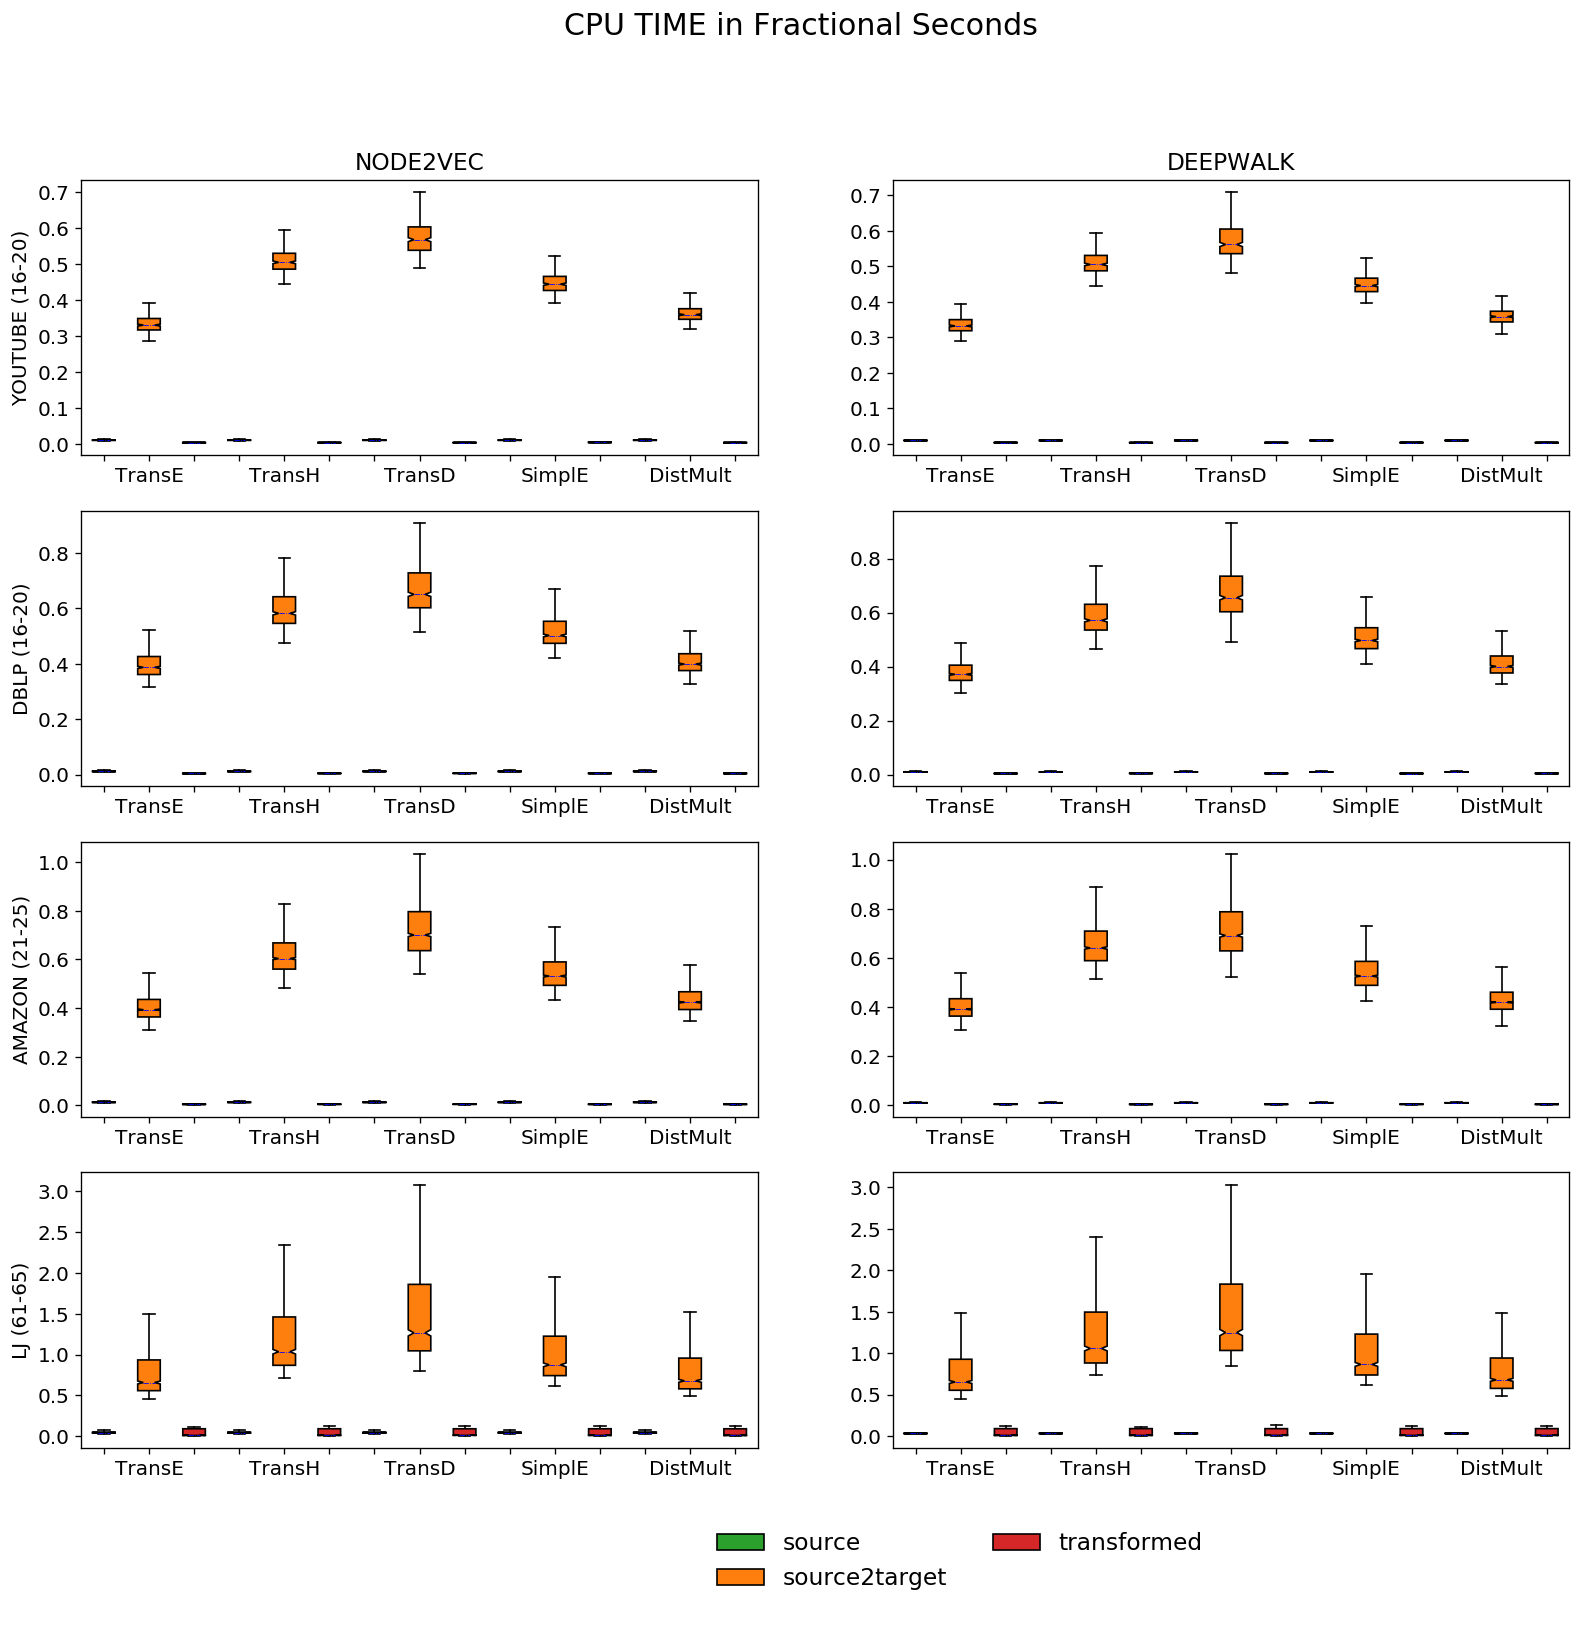

In [6]:
medianprops = dict(linestyle='-.', linewidth=0.5, color='blue')
fig = plt.figure(figsize=(16, 14), dpi= 120, facecolor='w', edgecolor='k')
i=1
for j, dataset in enumerate(datasets):
    graph_size = str(dataset_min_nodes[j]) + '-' + str(dataset_max_nodes[j])
    for source in sources:
        ax = fig.add_subplot(len(datasets), len(sources),i)
        all_stats = []
        for target in targets:
            for method in methods:

                filt = (df['DATASET'] == dataset) & \
                    (df['SIZE'] == graph_size) & \
                    (df['DIM'] == dim) & \
                    (df['METHOD'] == method) & \
                    (df['ALGORITHM_1'] == source) 
                
                if method in ['source2target','transformed']:
                    filt = filt & (df['ALGORITHM_2'] == target)
    
                row = df.loc[filt]
                stats = cbook.boxplot_stats(list(row['RUN_TIME']))[0]
                stats['label']=''
                stats['fliers']=[]
                if method=='source2target':
                    stats['label'] = target
                all_stats.append(stats)

        bp = ax.bxp(all_stats, shownotches=True,patch_artist=True,medianprops=medianprops)

        if i%2 == 1:
            ax.set_ylabel('{} ({})'.format(dataset.upper(), graph_size),fontsize=12)

        if j == 0:
            ax.set_title(source.upper(),fontsize=14)

        for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(12)

        for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(12)

        for k,box in enumerate(bp['boxes']):
            box.set(facecolor = colors[k%len(colors)]) 

        i+=1

plt.subplots_adjust(hspace=0.2, wspace=0.2)
fig.suptitle("CPU TIME in Fractional Seconds", fontsize=18)
fig.legend(bp['boxes'][:4],methods,loc='lower center',borderpad=0,bbox_to_anchor= (0.5, 0.01), ncol=2, 
        borderaxespad=1, frameon=False, fontsize=14)
fig.savefig(os.path.join(plot_path, 'Timing.png'))
            

In [7]:
datasets

['youtube', 'dblp', 'amazon', 'lj']